<a href="https://colab.research.google.com/github/Tavo826/UN/blob/main/Proyecto_TurbinaE%C3%B3lica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
%matplotlib inline

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

SystemError: ignored

# TURBINA EÓLICA O AEROGENERADOR

En este cuaderno se realiza un análisis del funcionamiento de los **aerogeneradores** o **turbinas eólicas**

Un aerogenerador es un generador eléctrico movido por una turbina accionada por el viento, sus aspas están conectadas al rotor que está a su vez conectado al eje, el cual envía la energía de rotación al generador eléctrico. Este generador utiliza imanes para producir voltaje y, por tanto, energía eléctrica.

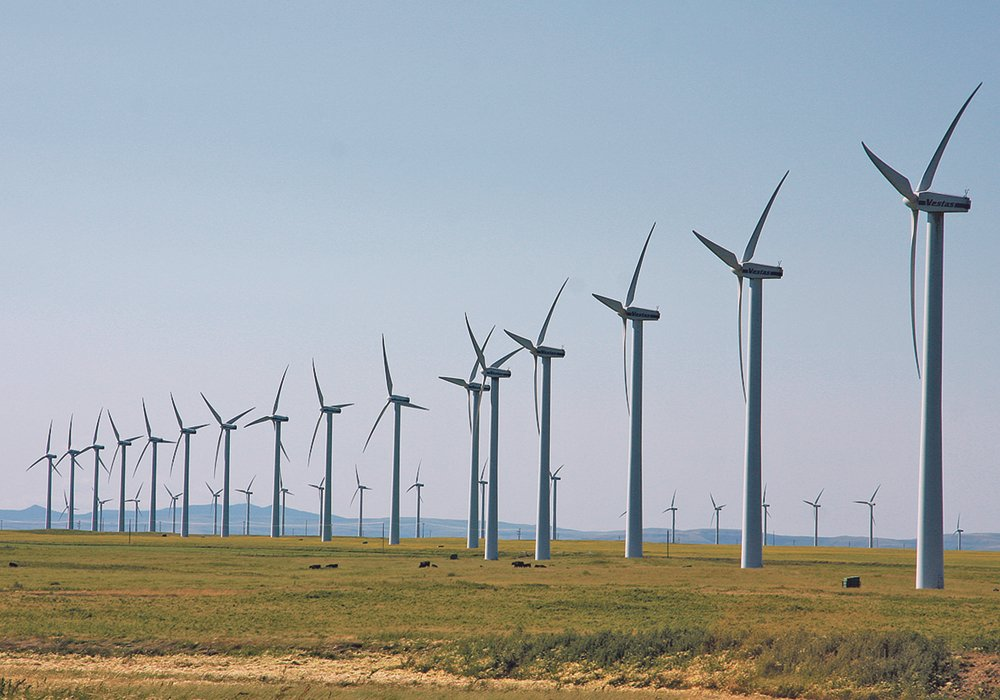

In [ ]:
Image('/content/drive/My Drive/Colab/Modelado/Images/wt.jpg', width=500)

## Componentes

Se presenta a continuación una descripción de las funciones de los componentes importantes de la turbina.

**Rotor:** recoge la energía del viento y la transforma en energía mecánica de rotación.

**Sistema de acoplo, soporte de la turbina:** adapata el movimiento de rotación de las aspas al rotor del generador de energía eléctrica.

**Multiplicador o caja de cambio:** Para velocidades del viento entre 20 y 100 Km/h, la velocidad de giro del rotor es del orfen de 10 a 40 r.p.m., para generar energía eléctrica, el rotor debe funcionar a 1500 r.p.m. Mediante un juego de múltiples engranajes, el multiplicador permite que la parte móvil del generador gire a la velocidad apropiada. También incorpora un freno que protege el generador ante la presencia de fuertes vientos (por encima de 80-90 Km/h).

**Generador:** es un conjunto **rotor-estator** que genera la energía elpectrica, la cual se transporta hacia una estación transformadora, que la ingresa al a red eléctroca. La potencia del generador varía entre 5 KWatts y 10MWatts.

**Motor de orientación:** permite girar la góndola hacia la dirección del viento dominante.

**Controlador:** monitoriza continuamente las condiciones del aerogenerador y controla el mecanismo de la orientación

**Veleta y Anemómetro:** este dispositivo está situado en la parte trasera de la góndola, determina la orientación y mide la velocidad del viento.

Con el control se puede modificar una serie de variables como las siguientes:

1. Regulación por frenos aerodinámicos: se activan cuando el giro del rotor sobrepasa un cierto valor

2. Control electrónico de la potencia: permite variar la velocidad del rotor. También es importante controlar la orientación en los generadores de eje horizontal, con el fin de obtener la máxima potencia.

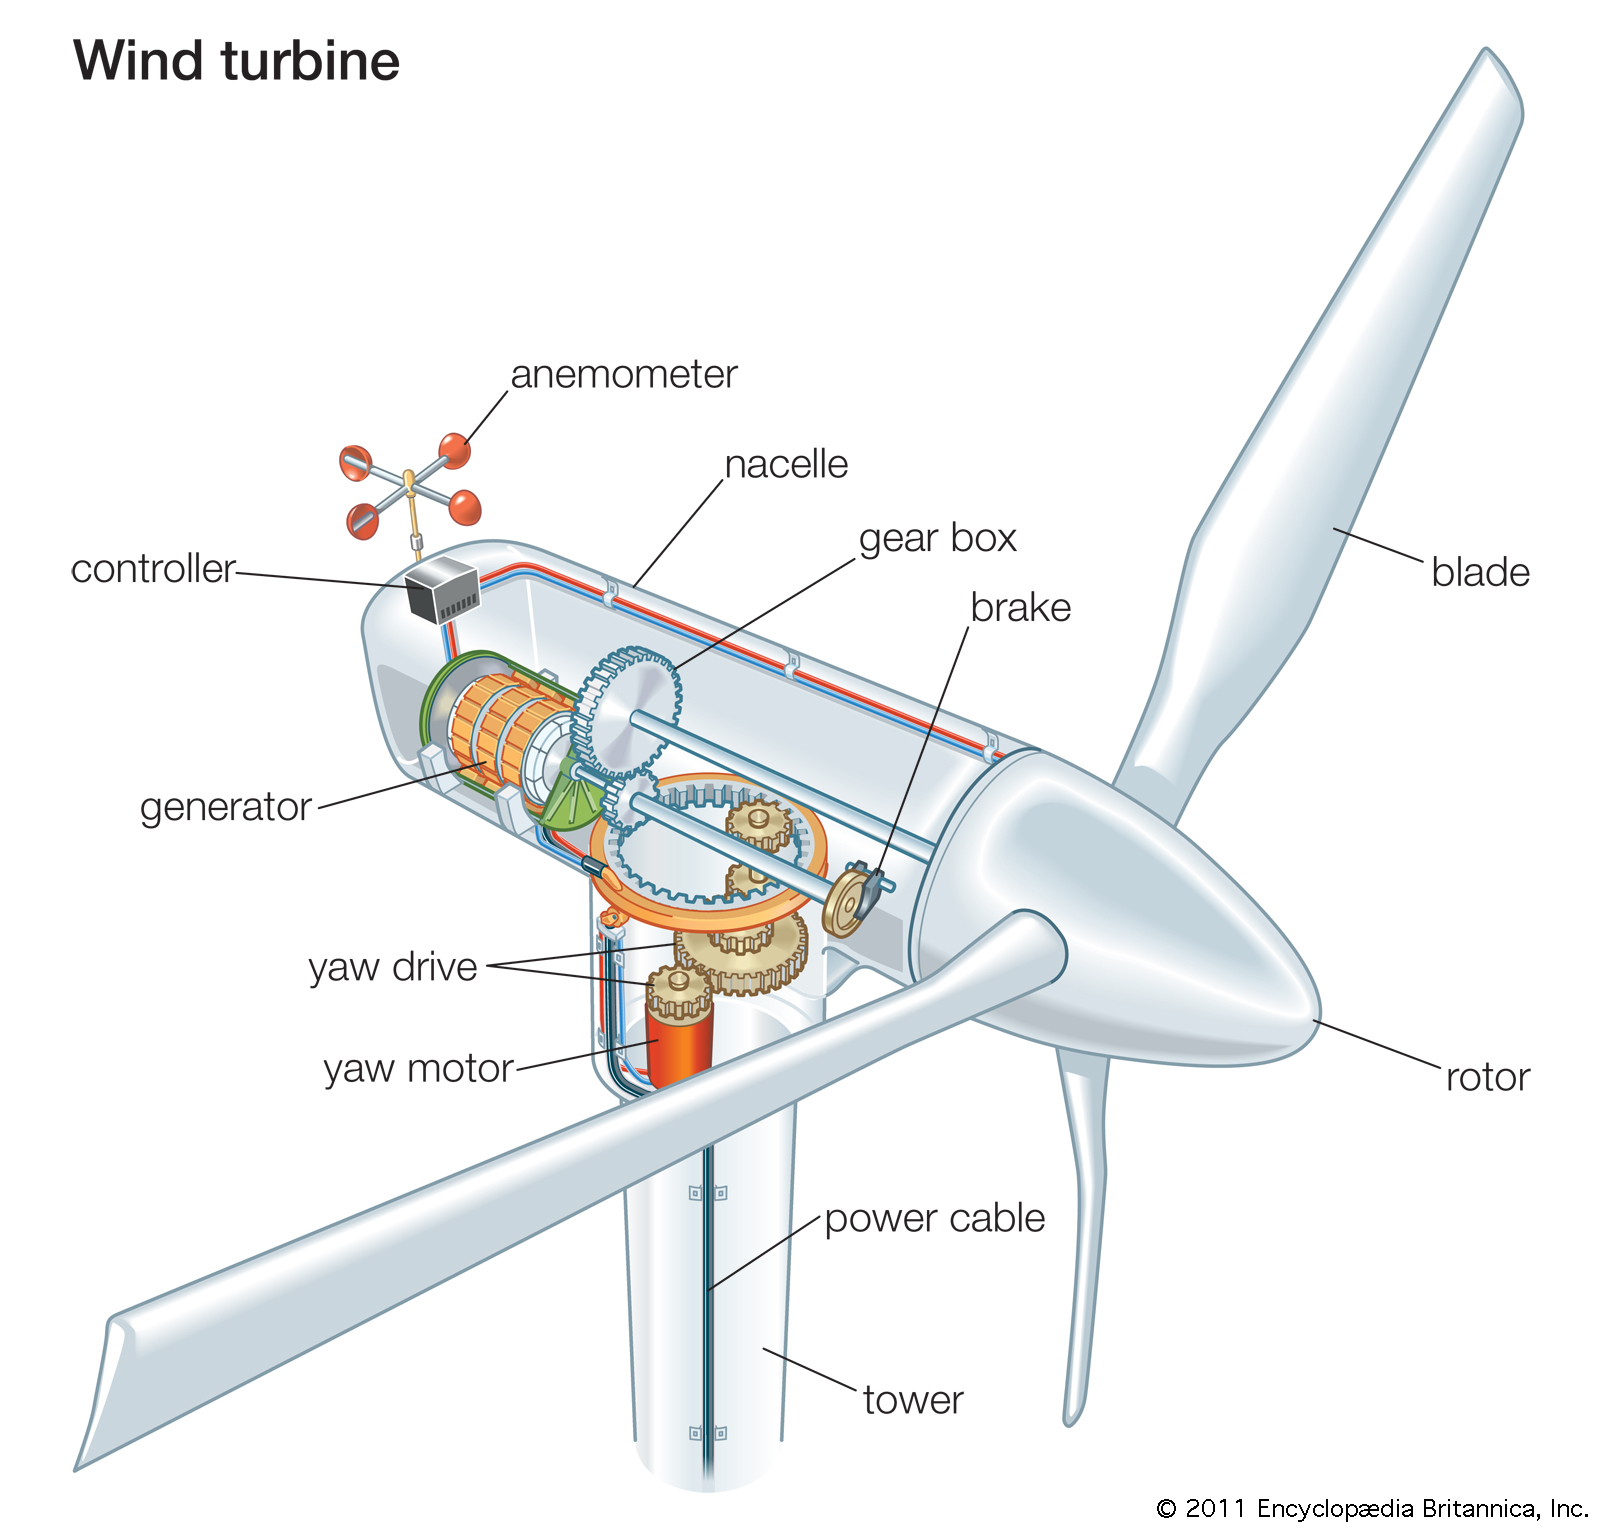

In [ ]:
Image('/content/drive/My Drive/Colab/Modelado/Images/Components-wind-turbine.jpg', width=500)

## Clasificación

Los aerogeneradores tiene diferentes formas de clasificarse, la más clásica es la posición de su eje, ya que puede ser horizontal o vertical.

* **Eje horizontal**:

 Sus ejes principales se encuentran paralelamente al suelo y necesitan un control de orientación al viento. Este tipo de aerogenerador permite obtener una mayor prodcción energética, pero su precio es mayor a los de eje vertical. Dentro de estos se encuentra otra clasificación por el número de palas, los cuales pueden tener 2, 3, o más palas; siendo los más utilizados los de 3 palas.

* **Eje vertical**:

 Los ejes principales son perpendiculares al suelo, una ventaja de esto es que captan el viento en cualquier dirección pero su eficiencia es menor a los de eje horizontal, lo cual ha hecho que se dejen de utilizar

 Otra forma de clasificarlos es si son de velocidad fija o variable.

* **Velocidad fija**:

 La velocidad de giro del rotor permanece constante  y  viene  determinada  por  la  frecuencia  de la  red,  la  relación  de  la multiplicadora y el diseño del generador, sin importar la velocidad de viento. Las  principales  ventajas  de  los  aerogeneradores  de velocidad  fija  son  su simplicidad, robustez y fiabilidad, además de su precio. Su principal desventaja es el  consumo  incontrolable  de  potencia  reactiva  y  la pobre  calidad  de  la  energía generada

* **Velocidad variable**:

  Están  diseñados  para  alcanzar  la máxima eficiencia aerodinámica para un amplio rango de velocidades de viento, lo  que  significa  aumentar  la  potencia  generada,  suavizar  las  oscilaciones  de potencia  debidas  a  la  variabilidad  del  viento  reduciendo  las  solicitaciones mecánicas del aerogenerador y mejorando la calidad de la energía entregada. Las  principales  ventajas  de  los  aerogeneradores  de velocidad  variable  son  el incremento de la energía capturada, la mejora de la calidad de la energía entregada y la reducción de las cargas mecánicas. Como principal desventaja está la pérdida de  energía  en  el  convertidor  de  potencia,  el  uso  de  más  componentes  y  el incremento del coste debido al uso de la electrónica de potencia.

 Existen dos tipos principales aerogeneradores de velocidad variable
 
 * Generador de inducción doblemente alimentado (DFIG): se alimenta tanto por el estator como por el rotor. Contiene circuitos de electrónica de potencia conectados al devanado rotórico para optimizar el funcionamiento de la turbina. Estos circuitos ayudan a extraer y regular la potencia mecánica procedente de la fuente de viente

 * Generador síncrono de imanes permanentes (PMSG): se sustituye el bobinado de excitación, normalmente en el rotor, por un sistema formado por   imanes permanentes que suministran un  campo de excitación constante.


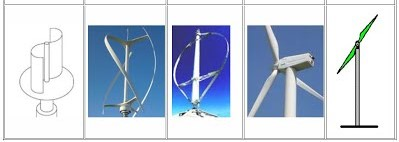

In [ ]:
Image('/content/drive/My Drive/Colab/Modelado/Images/fig2.jpg', width=500)

Se analizará el modelo matemático del aerogenerador de eje horizontal y velocidad variable, el más utilizado es el generador síncrono de imanes permanentes.

Este modelo se diseña basándose en un modelo dinámico síncrono giratorio

$$\begin{cases} 
  L_d\frac{di_d}{dt} = -R_si_d + w_eL_qi_q + u_d \\
  L_q\frac{di_q}{dt} = -R_si_q - w_eL_di_d - \Phi w_e - u_q \\
  J\frac{dw_g}{dt} = T_e - T_w - Bw_g
\end{cases}$$

Donde:

* $i_d$, $i_q$ y $w_e$ son las variables de estado, que representan las corrientes y la frecuencia angular del motor.
* $u_d$ y $u_q$ son los componentes de voltaje del estator del eje de línea y del eje del rotor.
* $J$ es el momento polar de inercia.
* $T$ es es torque de carga externa.
* $B$ es el coeficiente de amortiguamiento viscoso.
* $R_s$ es la resistencia del devanado del estator.
* $L_d$ y $L_q$ son los inductores del estator del eje lineal y del eje del rotor.
* $\Phi$ es el flujo magnético permanente.

Suponiendo que el generador tiene un espacio uniforme entre las aspas. El eje d y la inductancia del eje q son iguales. Se puede obtener la función del modelo adimensional.

\begin{cases}
  \dot{x} = \gamma(y-x) + \hat{T}_L + \epsilon zy \\
  \dot{y} = -y - xz + \sigma x + \hat{v}_q \\
  \dot{z} = -z + xy + \hat{v}_d
\end{cases}

Donde 

* $\epsilon = \frac{\rho\frac{L_q}{L_d}{L_q}^{2}\frac{fR}{L_q\rho\phi}(L_q-L_d)}{JR^2}$
 
 * $\rho$ es la densidad del aire.
 * $f$ es el coeficiente de fricción.
 * $R$ es el radio de las aspas.

* $\sigma = \frac{fT}{J}$
* $\gamma = \frac{T}{fL}$

El generador experimenta un comportamiento caótico cuando los parámetros operativos $\gamma$ y $\sigma$ caen en un área determinada y las entradas externas se establecen en cero, es decir, $\hat{T} = \hat{v}_d = \hat{v}_q = 0$. El sistema finalmente se describe de la siguiente manera

\begin{cases}
  \dot{x} = \gamma(y-x) + \epsilon zy \\
  \dot{y} = -y - xz + \sigma x \\
  \dot{z} = -z + xy \\
\end{cases}

El sistema muestra un estado caótico, se puede ver que cuando el sistema PMSG está en movimiento caótico, la turbina eólica oscilará aleatoriamente, la frecuencia aumentará y disminuirá, y el voltaje y la corriente aumentará y disminuirá, lo que pondrá en grave peligro el funcionamiento estable del sistema e incluso hará que el sistema se bloquee. Por lo tanto, es necesario estudiar métodos efectivos para controlar y suprimir este fenómeno de movimiento caótico.


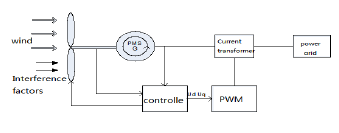

In [ ]:
Image('/content/drive/My Drive/Colab/Modelado/Images/im1.PNG')

$
x_0 = \hat{w} =  \\
y = \hat{T}_q \\
z = \hat{T}_d
$

### Equilibrios

Los equilibrios del sistema se pueden encontrar resolviendo

$$0 = \gamma(y-x) + \epsilon zy$$
$$0 = -y - xz + \sigma x$$
$$0 = -z + xy$$

Resolviendo este sistema en un software se obtienen las soluciones:

* $E_1 = (0,0,0)$
* $E_{2,3} = (y-1,\pm\sqrt{y-1},\pm\sqrt{y-1})$

La estabilidad del sistema se puede conocer con la matriz Jacobiana

$$J(x,y,z) = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} & \frac{\partial f_1}{\partial z}\\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} & \frac{\partial f_2}{\partial z}\\
\frac{\partial f_3}{\partial x} & \frac{\partial f_3}{\partial y} & \frac{\partial f_3}{\partial z}
\end{pmatrix}$$

Que para este sistema sería

$$J(x,y,z) = \begin{pmatrix}
-\gamma & \gamma+\epsilon z & \epsilon y \\
-z+\sigma & -1 & -x \\
y & x & -1
\end{pmatrix}$$

Reemplazando el punto crítico $E1$ en esta matriz

$$J(0,0,0) = \begin{pmatrix}
-\gamma & \gamma & 0 \\
\sigma & -1 & 0 \\
0 & 0 & -1
\end{pmatrix}$$

Encontrando los valores propios de la matriz

$$J(0,0,0) = \begin{pmatrix}
-\gamma-\lambda & \gamma & 0 \\
\sigma & -1-\lambda & 0 \\
0 & 0 & -1-\lambda
\end{pmatrix}$$

$-\lambda^3-(2-\gamma)\lambda^2-(1+2\gamma-\gamma *\sigma)\lambda-\gamma-\gamma *\sigma = 0$

El equilibrio depende del valor que tengan las constantes. En la literatura se proponen los siguientes valores $\gamma =5.45$, $\sigma = 20$ y $\epsilon = 1$ con condiciones iniciales $x,y,z = 3,3,3$. Es allí donde el sistema se comporta de una manera caótica.



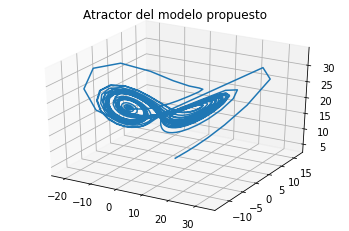

In [ ]:
def aerogenerador(t, w, epsilon, gamma, sigma):
  dw = [gamma*(w[1]-w[0]) + epsilon*w[2]*w[1],
        -w[1] - w[0]*w[2] + sigma*w[0], 
        -w[2] + w[0]*w[1]]
  return dw

epsilon = 1
gamma = 5.45
sigma = 20

tspan = [0,30]

t = np.linspace(tspan[0], tspan[1], 1000)
w0 = [3,3,3]

sol=solve_ivp(aerogenerador,tspan,w0,
              args=(epsilon, gamma, sigma),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
plt.title('Atractor del modelo propuesto')
plt.show()

### Bifurcaciones

Se puede conocer la estabilidad del sistema al modificar uno de sus parámetros.

Primero se da el valor a gamma de 5.45 y se varía sigma, seguidamente para sigma igual a 20, se varía el valor de gamma. Todo esto para conocer el comportamiento de la corriente de cuadratura del rotor y la corriente directa del mismo.

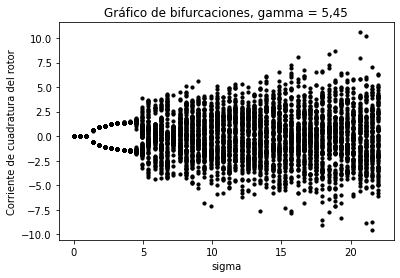

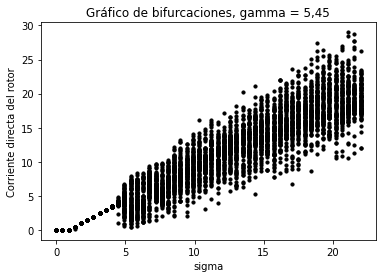

In [ ]:
# Modificando sigma

gamma = 5.45
sigma = np.linspace(0, 22, 50)

w1 = np.linspace(0.1,5,100)

for j in range(sigma.size):
  for ini in w1:
    sol = solve_ivp(aerogenerador, tspan, [ini,ini,ini], 
                    args=(epsilon, gamma, sigma[j]))
    t = sol.t
    x = sol.y

    plt.scatter(sigma[j], x[1,-1], c='k', s=10)
    
plt.title('Gráfico de bifurcaciones, gamma = 5,45')
plt.xlabel('sigma')
plt.ylabel('Corriente de cuadratura del rotor')
plt.show()

for j in range(sigma.size):
  for ini in w1:
    sol = solve_ivp(aerogenerador, tspan, [ini,ini,ini], 
                    args=(epsilon, gamma, sigma[j]))
    t = sol.t
    x = sol.y

    plt.scatter(sigma[j], x[2,-1], c='k', s=10)

plt.title('Gráfico de bifurcaciones, gamma = 5,45')
plt.xlabel('sigma')
plt.ylabel('Corriente directa del rotor')
plt.show()

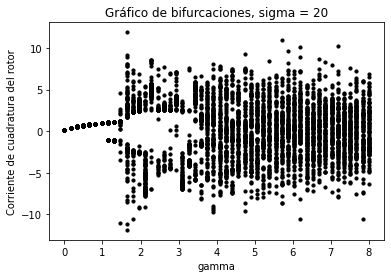

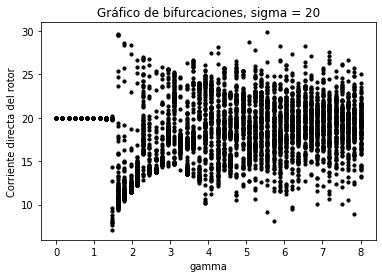

In [ ]:
# Modificando gamma

sigma = 20
gamma = np.linspace(0, 8, 50)

w2 = np.linspace(0.1,5,100)

for j in range(gamma.size):
  for ini in w2:
    sol = solve_ivp(aerogenerador, tspan, [ini,ini,ini], 
                    args=(epsilon, gamma[j], sigma))
    t = sol.t
    x = sol.y

    plt.scatter(gamma[j], x[1,-1], c='k', s=10)

plt.title('Gráfico de bifurcaciones, sigma = 20')
plt.xlabel('gamma')
plt.ylabel('Corriente de cuadratura del rotor')
plt.show()

for j in range(gamma.size):
  for ini in w2:
    sol = solve_ivp(aerogenerador, tspan, [ini,ini,ini], 
                    args=(epsilon, gamma[j], sigma))
    t = sol.t
    x = sol.y

    plt.scatter(gamma[j], x[2,-1], c='k', s=10)

plt.title('Gráfico de bifurcaciones, sigma = 20')
plt.xlabel('gamma')
plt.ylabel('Corriente directa del rotor')
plt.show()

### Atractor

Se puede observar cómo desde cualquier condición inicial, las trayectorias convergen a una zona donde se quedan oscilando aunque la variable t tienda a infinito

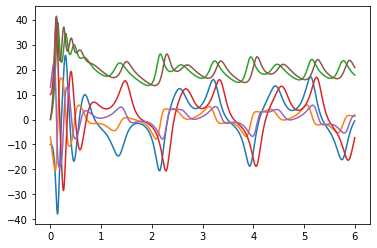

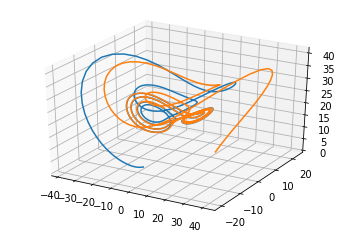

In [ ]:
gamma = 5.45
sigma = 20

fg_time,ax_time = plt.subplots()
fg_ss,ax_ss = plt.subplots()

ax = plt.axes(projection='3d')

tend = 6
t = np.linspace(0,tend,1000)

for w0_1 in np.linspace(-10,10,2):
  w0 = [w0_1,w0_1+3,0]
  sol = solve_ivp(aerogenerador, [0,tend], w0,
                  args=(epsilon, gamma, sigma), t_eval=t,
                  dense_output=True)

  ax_time.plot(t, sol.y[0,:])
  ax_time.plot(t, sol.y[1,:])
  ax_time.plot(t, sol.y[2,:])

  ax.plot3D(sol.y[0], sol.y[1], sol.y[2])

plt.show()